In [43]:
from astropy.constants import G
import astropy.coordinates as coord
import astropy.table as at
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from scipy.optimize import minimize

In [49]:
r = 770 * u.kpc
vr = -110 * u.km/u.s
tp = 13.75 * u.Gyr

vr_tp_over_r = vr * tp / r
A.decompose()

<Quantity -2.0088989>

In [56]:
def etafunc(eta, vr_tp_over_r):
    B = np.sin(eta) * (eta - np.sin(eta)) / (1 - np.cos(eta))**2
    return vr_tp_over_r - B

<ipython-input-56-4436785a443a>:2: RuntimeWarning: divide by zero encountered in true_divide
  B = np.sin(eta) * (eta - np.sin(eta)) / (1 - np.cos(eta))**2
<ipython-input-56-4436785a443a>:2: RuntimeWarning: invalid value encountered in true_divide
  B = np.sin(eta) * (eta - np.sin(eta)) / (1 - np.cos(eta))**2


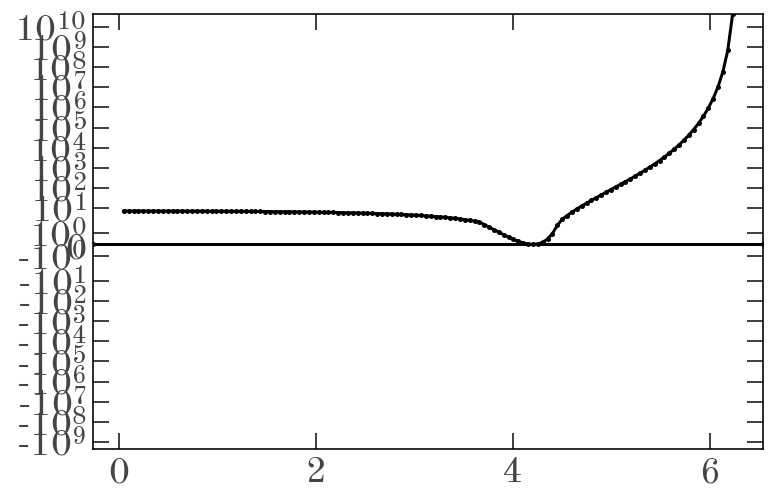

In [57]:
etas = np.linspace(0, 2*np.pi, 128)
plt.plot(etas, etafunc(etas, vr_tp_over_r)**2)
plt.axhline(0)
plt.yscale('symlog')

In [64]:
def get_eta(vr_tp_over_r):
    etas = np.linspace(0, 2*np.pi, 128)
    eta0 = etas[np.nanargmin(etafunc(etas, vr_tp_over_r) ** 2)]
    
    res = minimize(lambda *args: etafunc(*args) ** 2, 
                   x0=eta0, 
                   args=(vr_tp_over_r.decompose().value, ), 
                   method='powell')
    if not res.success:
        return np.nan
    else:
        return res.x[0]

In [65]:
def get_M(r, vr, tp, eta):
    a = r / (1 - np.cos(eta))
    M = a * vr**2 / G * ((1 - np.cos(eta)) / np.sin(eta))**2
    return M.to(u.Msun)

In [68]:
eta = get_eta(vr_tp_over_r)
get_M(r, vr, tp, eta)

<ipython-input-56-4436785a443a>:2: RuntimeWarning: divide by zero encountered in true_divide
  B = np.sin(eta) * (eta - np.sin(eta)) / (1 - np.cos(eta))**2
<ipython-input-56-4436785a443a>:2: RuntimeWarning: invalid value encountered in true_divide
  B = np.sin(eta) * (eta - np.sin(eta)) / (1 - np.cos(eta))**2


<Quantity 4.21667495e+12 solMass>

In [82]:
eta

4.204586468707631

In [70]:
from yellowcard.coordinates import LocalGroupHalocentric, fiducial_m31_c

In [77]:
# VDM 2012
galcen_frame = coord.Galactocentric(
    galcen_distance=8.29*u.kpc, 
    galcen_v_sun=[11.1, 12.24 + 239.3, 7.25] * u.km/u.s, 
    z_sun=0*u.pc
)

In [78]:
m31_c = coord.SkyCoord(
    fiducial_m31_c.ra,
    fiducial_m31_c.dec,
    770*u.kpc
)
m31_lgh = m31_c.transform_to(galcen_frame).transform_to(LocalGroupHalocentric())

In [80]:
pos = m31_lgh.data.represent_as(coord.SphericalRepresentation)
v_rad_only = coord.SphericalDifferential(0*u.mas/u.yr, 0*u.mas/u.yr, -110*u.km/u.s)
lgh = LocalGroupHalocentric(pos.with_differentials(v_rad_only))
v_rad_only_icrs = lgh.transform_to(galcen_frame).transform_to(coord.ICRS())
v_rad_only_icrs

<ICRS Coordinate: (ra, dec, distance) in (deg, deg, kpc)
    (10.60863608, 41.23480472, 770.01047131)
 (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
    (0.03877374, -0.02161092, -302.22257454)>

In [81]:
v_rad_only_icrs.transform_to(galcen_frame).transform_to(LocalGroupHalocentric()).velocity

<LocalGroupHalocentric Coordinate (m31_coord=<ICRS Coordinate: (ra, dec, distance) in (deg, deg, kpc)
    (10.68470833, 41.26875, 731.)
 (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
    (0.04898, -0.03685, -300.)>, lg_pole=(-0.83720219, -0.3124973, 0.44881838) ): (x, y, z) in kpc
    (774.02611519, -0.10653648, -2.15826488)
 (v_x, v_y, v_z) in km / s
    (-110.0000597, 0.01514034, 0.30671997)>